In [6]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
import torch

In [7]:
def summary_test(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["test_loss"])
    tmp2 = np.array(history[0]["test_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["test_loss"])
        tmp2 += np.array(history[j]["test_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_val(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["val_loss"])
    tmp2 = np.array(history[0]["val_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["val_loss"])
        tmp2 += np.array(history[j]["val_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

def summary_train(file_path, n_nodes):
    
    history = [pickle.load(open(file_path + "/node" + str(j) + ".pk", "rb")) for j in range(n_nodes)]
    tmp = np.array(history[0]["train_loss"])
    tmp2 = np.array(history[0]["train_acc"])
    for j in range(1, n_nodes):
        tmp += np.array(history[j]["train_loss"])
        tmp2 += np.array(history[j]["train_acc"])
    
    test_loss = tmp/n_nodes
    test_acc = tmp2/n_nodes
    
    return test_loss, test_acc

In [8]:
def search_best_lr(path, n_nodes, lr_list):
    
    best_acc = -1
    best_lr = -1
    
    for lr in lr_list:
        _, acc = summary_val(f"{path}/lr_{lr}_beta_0.9", n_nodes)
            
        #print(method, lr, acc[-1])
        if best_acc < acc[-1]:
            best_acc = acc[-1]
            best_lr = lr
    return best_lr

def average_acc(acc_list):
    avg = []
    std = []
    for i in range(len(acc_list[0])):
        avg.append(np.average([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        std.append(np.std([acc_list[j][i] * 100 for j in range(len(acc_list))]))
        
    return avg, std

In [9]:
!ls ../results_complete/cifar10_vgg/qg_dsgdm/node_15/1_local_step/0/alpha_0.01/

one_peer_adic  one_peer_exp  ring


ring 0.1 84.966 0.9690794409969655
one_peer_adic 0.1 88.488 0.1051221511702758
one_peer_exp 0.1 88.21999999999998 0.34082644654820426


Text(0.5, 1.0, 'n=15, alpha=0.1')

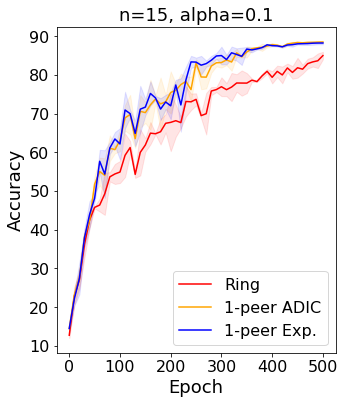

In [10]:
alpha = 0.1
n_nodes = 15
local_step = 1

dataset = "cifar10"
model = "vgg"
optimizer = "qg_dsgdm"

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []

    for seed in [0,1,2]:
        lr = search_best_lr(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.01, 0.001])
        loss, acc = summary_test(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)

    avg, std = average_acc(acc_list)
    print(graph, lr, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


ring [0.1, 0.1, 0.1] 68.78444444444443 2.8659679941007505
one_peer_adic [0.1, 0.1, 0.1] 87.16422222222224 0.3101074286178121
one_peer_exp [0.1, 0.1, 0.1] 87.08555555555556 0.46511371236730725


Text(0.5, 1.0, 'n=15, alpha=0.01')

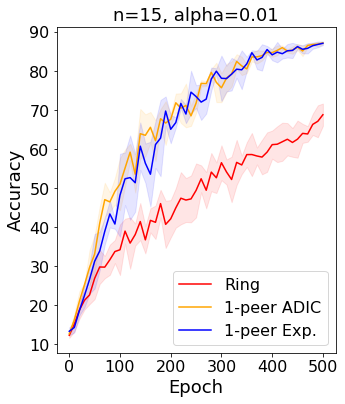

In [6]:
alpha = 0.01
n_nodes = 15
local_step = 1

dataset = "cifar10"
model = "vgg"
optimizer = "qg_dsgdm"

colors = ["red", "orange", "blue", "green", "black", "navy"]
graphs = ["ring", "one_peer_adic", "one_peer_exp"]
labels = ["Ring", "1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    lr_list = []
    
    for seed in [0,1,2]:
        lr = search_best_lr(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.1, 0.01, 0.001])
        loss, acc = summary_test(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        lr_list.append(lr)
        
    avg, std = average_acc(acc_list)
    print(graph, lr_list, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


one_peer_adic [0.1, 0.1, 0.1] 85.13813333333333 0.20210158061947014
one_peer_exp [0.1, 0.1, 0.1] 85.01333333333334 0.3141648541061751


Text(0.5, 1.0, 'n=25, alpha=0.01')

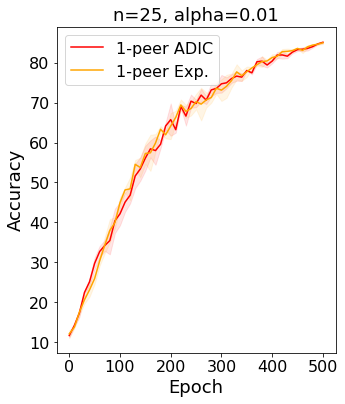

In [13]:
alpha = 0.01
n_nodes = 25
local_step = 1

dataset = "cifar10"
model = "vgg"
optimizer = "qg_dsgdm"

colors = ["red", "orange", "blue", "green", "black", "navy"]
#graphs = ["ring", "one_peer_adic", "one_peer_exp"]
#labels = ["Ring", "1-peer ADIC", "1-peer Exp."]
graphs = ["one_peer_adic", "one_peer_exp"]
labels = ["1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    lr_list = []
    
    for seed in [0,1,2]:
        lr = search_best_lr(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_lgitocal_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.5, 0.1, 0.01, 0.001])
        loss, acc = summary_test(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        lr_list.append(lr)
        
    avg, std = average_acc(acc_list)
    print(graph, lr_list, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)


one_peer_adic [0.5, 0.1] 87.09039999999996 0.15400000000000347
one_peer_exp [0.1, 0.1] 87.02300000000002 0.2745999999999995


Text(0.5, 1.0, 'n=25, alpha=0.1')

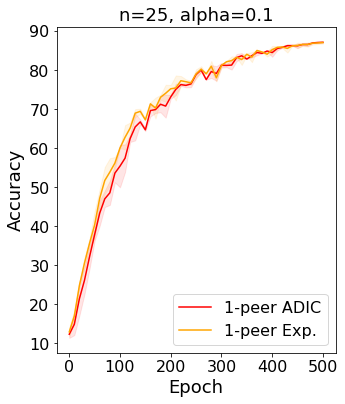

In [12]:
alpha = 0.1
n_nodes = 25
local_step = 1

dataset = "cifar10"
model = "vgg"
optimizer = "qg_dsgdm"

colors = ["red", "orange", "blue", "green", "black", "navy"]
#graphs = ["ring", "one_peer_adic", "one_peer_exp"]
#labels = ["Ring", "1-peer ADIC", "1-peer Exp."]
graphs = ["one_peer_adic", "one_peer_exp"]
labels = ["1-peer ADIC", "1-peer Exp."]

results = []

plt.figure(figsize=(5,6))

for graph, label, color in zip(graphs, labels, colors):
        
    acc_list = []
    lr_list = []
    
    for seed in [0,1]:
        lr = search_best_lr(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}", n_nodes, [0.5, 0.1, 0.01])
        loss, acc = summary_test(f"../results_complete/{dataset}_{model}/{optimizer}/node_{n_nodes}/{local_step}_local_step/{seed}/alpha_{alpha}/{graph}/lr_{lr}_beta_0.9", n_nodes)
        acc_list.append(acc)
        lr_list.append(lr)
        
    avg, std = average_acc(acc_list)
    print(graph, lr_list, avg[-1], std[-1])
    plt.plot([i*10 for i in range(len(acc))], avg, label=label, color=color, alpha=1.0)
    plt.fill_between([i*10 for i in range(len(acc))], np.array(avg) - np.array(std), np.array(avg) + np.array(std), color=color, alpha=0.1)

plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Epoch", fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title(f"n={n_nodes}, alpha={alpha}", fontsize=18)
